In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model,):
    df = df.loc[df['Model'] == model].iloc[0,1:]
    x = df.to_numpy().astype(float).T
    return x

# Load Knee results
df = pd.read_excel('./data/throughput.xlsx')

unt_008M = df2np(df, 'U-Net-8M')
unt_031M = df2np(df, 'U-Net-31M')
unt_124M = df2np(df, 'U-Net-124M')

vit_008M = df2np(df, 'ViT-8M/10')
vit_032M = df2np(df, 'ViT-32M/10')
vit_060M = df2np(df, 'ViT-60M/10')


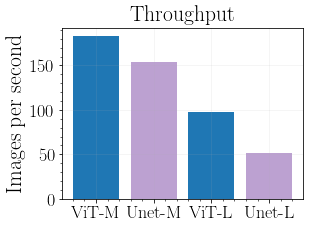

In [23]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(0.6*w, 0.7*h))

""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

alpha = 1

""" Test throughput """
# ax = axes[0]
# ax.bar('S', vit_008M[1], color = vits.color, alpha=alpha,)
# ax.bar('S ', unt_008M[1], color = unts.color, alpha=alpha,)
ax.bar('ViT-M',vit_032M[1], color = vitm.color, alpha=alpha, label='ViT')
ax.bar('Unet-M ', unt_031M[1], color = untm.color, alpha=alpha, label='U-Net')
ax.bar('ViT-L',vit_060M[1], color = vitl.color, alpha=alpha)
ax.bar('Unet-L ',unt_124M[1], color = untl.color, alpha=alpha)
# ax.set_xticks([])
# ax.set_xlabel('Model variant')
ax.set_ylabel('Images per second')
ax.set_title('Throughput')
# ax.legend()

# handles, labels = ax.get_legend_handles_labels()

## Save
fig.savefig('./plots/speed.pdf', format="pdf", bbox_inches = 'tight')

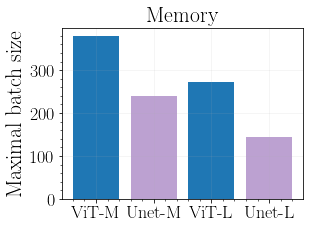

In [24]:
w, h = plt.rcParams["figure.figsize"]
fig, ax = plt.subplots(1, 1, figsize=(0.6*w, 0.7*h))

""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

alpha = 1

""" Test CPU """
# ax.bar('S' , vit_008M[-1], color = vits.color, alpha=alpha,)
# ax.bar('S ', unt_008M[-1], color = unts.color, alpha=alpha,)
ax.bar('ViT-M', vit_032M[-1], color = vitm.color, alpha=alpha, label='ViT')
ax.bar('Unet-M ', unt_031M[-1], color = untm.color, alpha=alpha, label='U-Net')
ax.bar('ViT-L', vit_060M[-1], color = vitl.color, alpha=alpha, )
ax.bar('Unet-L', unt_124M[-1], color = untl.color, alpha=alpha, )
# ax.set_xlabel('Model variant')
ax.set_ylabel('Maximal batch size')
ax.set_title('Memory')
# ax.yaxis.set_ticks(np.arange(0, 510, 100))
# ax.set_yticks([0, 200, 400, 600])
# ax.legend()

# handles, labels = ax.get_legend_handles_labels()

## Save
fig.savefig('./plots/memory.pdf', format="pdf", bbox_inches = 'tight')